In [1]:
import mysql.connector as connector

In [2]:
connection = connector.connect(user="root",password="FATIHAM68860",host="127.0.0.1",port=3306)

In [3]:
cursor = connection.cursor()

In [4]:
cursor.execute("SHOW DATABASES")

In [5]:
cursor.fetchall()
create_db = """CREATE DATABASE IF NOT EXISTS little_lemon"""
cursor.execute(create_db)

In [6]:
use_database = """USE little_lemon"""
cursor.execute(use_database)

In [7]:
created_menu = """ 
CREATE TABLE  MenuItems (
menuID INT AUTO_INCREMENT PRIMARY KEY,
name VARCHAR(200),
type VARCHAR(100),
price INT
)
"""

In [8]:
cursor.execute(created_menu)

ProgrammingError: 1050 (42S01): Table 'menuitems' already exists

In [9]:
show_db = "SHOW DATABASES"
show_tables = "SHOW TABLES FROM little_lemon"

In [10]:
cursor.execute(show_db)

for db in cursor:
    print(db)

('information_schema',)
('little_lemon',)
('mysql',)
('performance_schema',)
('sakila',)
('sys',)
('world',)


In [11]:
cursor.execute(show_tables)
cursor.fetchall()

[('bookings',), ('menuitems',), ('menus',), ('orders',)]

In [12]:
connection.database

'little_lemon'

In [13]:
create_menu_table = """CREATE TABLE Menus (
MenuID INT,
ItemID INT,
Cuisine VARCHAR(100),
PRIMARY KEY (MenuID,ItemID)
);"""
cursor.execute(create_menu_table)

ProgrammingError: 1050 (42S01): Table 'menus' already exists

In [14]:
Create_booking_table = """CREATE TABLE Bookings (
BookingID INT AUTO_INCREMENT,
TableNo INT,
GuestFirstName VARCHAR(100) NOT NULL,
GuestLastName VARCHAR(100) NOT NULL,
BookingSlot TIME NOT NULL,
EmployeeID INT,
PRIMARY KEY (BookingID)
);"""
cursor.execute(Create_booking_table)

ProgrammingError: 1050 (42S01): Table 'bookings' already exists

In [15]:
!pip show numpy

Name: numpy
Version: 1.23.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: C:\Users\hamad\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: 
Required-by: altair, contourpy, cvzone, d2l, djitellopy, h5py, jax, langchain, matplotlib, ml-dtypes, numexpr, opencv-python, opt-einsum, pandas, pyarrow, pydeck, scikit-learn, scipy, seaborn, shapely, streamlit, tensorboard, tensorflow-intel, transformers


In [16]:
create_orders_table = """CREATE TABLE Orders (
OrderID INT,
TableNo INT,
MenuID INT,
BookingID INT,
BillAmount INT,
Quantity INT,
PRIMARY KEY (OrderID,TableNo)
);"""
cursor.execute(create_orders_table)

ProgrammingError: 1050 (42S01): Table 'orders' already exists

In [17]:
sql_query = 'SHOW TABLES FROM Little_lemon'

In [18]:
cursor.fetchall()
cursor.execute(sql_query)
results = cursor.fetchall()
for x in results:
    print(x)

('bookings',)
('menuitems',)
('menus',)
('orders',)


In [19]:
cursor = connection.cursor(dictionary=True)
cursor.execute(sql_query)
results = cursor.fetchall()
for x in results:
    print(x)

{'Tables_in_little_lemon': 'bookings'}
{'Tables_in_little_lemon': 'menuitems'}
{'Tables_in_little_lemon': 'menus'}
{'Tables_in_little_lemon': 'orders'}


In [20]:
cursor = connection.cursor(buffered=True)
cursor.execute(sql_query)
results = cursor.fetchall()
for x in results:
    print(x)

('bookings',)
('menuitems',)
('menus',)
('orders',)


In [21]:
sql_query =  """ INSERT INTO Menus VALUES(6,2,"Africa Cuisine"),(4,3,"Burkina Food"),(5,4,"Bobo food")"""
adding_new_menu = cursor.execute(sql_query)
connection.commit()

IntegrityError: 1062 (23000): Duplicate entry '6-2' for key 'menus.PRIMARY'

In [22]:
cursor = connection.cursor(dictionary=True)
sql_query =  """ SELECT * FROM Menus"""
cursor.execute(sql_query)
menus = cursor.fetchall()

for menu in menus:
    print(menu)

{'MenuID': 1, 'ItemID': 2, 'Cuisine': 'Africa Cuisine'}
{'MenuID': 2, 'ItemID': 3, 'Cuisine': 'Burkina Food'}
{'MenuID': 3, 'ItemID': 4, 'Cuisine': 'Bobo food'}
{'MenuID': 4, 'ItemID': 3, 'Cuisine': 'Burkina Food'}
{'MenuID': 5, 'ItemID': 4, 'Cuisine': 'Bobo food'}
{'MenuID': 6, 'ItemID': 2, 'Cuisine': 'Africa Cuisine'}


In [23]:
columns = cursor.column_names
cursor.close()

True

In [24]:
print(columns)

('MenuID', 'ItemID', 'Cuisine')


In [25]:
cursor = connection.cursor()
insert_bookings="""
INSERT INTO Bookings (BookingID, TableNo, GuestFirstName, 
GuestLastName, BookingSlot, EmployeeID)
VALUES
(1,12,'Anna','Iversen','19:00:00',1),
(2, 12, 'Joakim', 'Iversen', '19:00:00', 1),
(3, 19, 'Vanessa', 'McCarthy', '15:00:00', 3),
(4, 15, 'Marcos', 'Romero', '17:30:00', 4),
(5, 5, 'Hiroki', 'Yamane', '18:30:00', 2),
(6, 8, 'Diana', 'Pinto', '20:00:00', 5);"""
sql_query =  insert_bookings
cursor.execute(sql_query)
cursor.close()

IntegrityError: 1062 (23000): Duplicate entry '2' for key 'bookings.PRIMARY'

In [26]:
cursor = connection.cursor(dictionary=True)
sql_query =  """ SELECT * FROM Bookings"""
cursor.execute(sql_query)
bookings = cursor.fetchall()

for booking in bookings:
    print(booking)

{'BookingID': 2, 'TableNo': 12, 'GuestFirstName': 'Joakim', 'GuestLastName': 'Iversen', 'BookingSlot': datetime.timedelta(seconds=68400), 'EmployeeID': 1}
{'BookingID': 3, 'TableNo': 19, 'GuestFirstName': 'Vanessa', 'GuestLastName': 'McCarthy', 'BookingSlot': datetime.timedelta(seconds=54000), 'EmployeeID': 3}
{'BookingID': 5, 'TableNo': 5, 'GuestFirstName': 'Hiroki', 'GuestLastName': 'Yamane', 'BookingSlot': datetime.timedelta(seconds=66600), 'EmployeeID': 2}


In [1]:
print("This function returns price based on menu_id")
print("---------------------------------------------")

# Define the function without using DELIMITER
query = """
CREATE FUNCTION MenuPrice(menu_id INT, discount_rate DECIMAL(4,2))
RETURNS DECIMAL(10,2) DETERMINISTIC
BEGIN
    -- Declare variables
    DECLARE menuprice DECIMAL(10,2);
    DECLARE discounted_value DECIMAL(10,2);

    -- Fetch price into menuprice
    SELECT price INTO menuprice FROM MenuItems WHERE menuID = menu_id;
    
    -- Check the validity of menuprice
    IF menuprice IS NULL THEN
        RETURN NULL;
    END IF;
    
    -- Check the validity of discount rate
    IF discount_rate < 0 OR discount_rate > 1 THEN
        RETURN NULL;
    END IF;
    
    -- Calculate discounted value
    SET discounted_value = menuprice - (menuprice * discount_rate);
    
    -- Return the discounted value
    RETURN discounted_value;
END;
"""

# Execute the query to create the function
cursor.execute(query)

print("Function created successfully!")

This function returns price based on menu_id
---------------------------------------------


NameError: name 'cursor' is not defined

In [28]:
cursor = connection.cursor(dictionary=True)
sql_query =  """ SELECT * FROM Menuitems"""
cursor.execute(sql_query)
bookings = cursor.fetchall()

for booking in bookings:
    print(booking)

{'menuID': 1, 'name': 'Olives', 'type': 'Starters', 'price': 5}
{'menuID': 2, 'name': 'Flatbread', 'type': 'Starters', 'price': 5}
{'menuID': 3, 'name': 'Minestrone', 'type': 'Starters', 'price': 8}
{'menuID': 4, 'name': 'Tomato bread', 'type': 'Starters', 'price': 8}
{'menuID': 5, 'name': 'Falafel', 'type': 'Starters', 'price': 7}
{'menuID': 6, 'name': 'Hummus', 'type': 'Starters', 'price': 5}
{'menuID': 7, 'name': 'Greek salad', 'type': 'Main Courses', 'price': 15}
{'menuID': 8, 'name': 'Bean soup', 'type': 'Main Courses', 'price': 12}
{'menuID': 9, 'name': 'Pizza', 'type': 'Main Courses', 'price': 15}
{'menuID': 10, 'name': 'Greek yoghurt', 'type': 'Desserts', 'price': 7}
{'menuID': 11, 'name': 'Ice cream', 'type': 'Desserts', 'price': 6}
{'menuID': 12, 'name': 'Cheesecake', 'type': 'Desserts', 'price': 4}
{'menuID': 13, 'name': 'Athens White wine', 'type': 'Drinks', 'price': 25}
{'menuID': 14, 'name': 'Corfu Red Wine', 'type': 'Drinks', 'price': 30}
{'menuID': 15, 'name': 'Turkish 

In [29]:
cursor = connection.cursor(dictionary=True)
sql_query =  """ SELECT * FROM Menuitems"""
cursor.execute(sql_query)
bookings = cursor.fetchmany(size=5)

for booking in bookings:
    print(booking)

{'menuID': 1, 'name': 'Olives', 'type': 'Starters', 'price': 5}
{'menuID': 2, 'name': 'Flatbread', 'type': 'Starters', 'price': 5}
{'menuID': 3, 'name': 'Minestrone', 'type': 'Starters', 'price': 8}
{'menuID': 4, 'name': 'Tomato bread', 'type': 'Starters', 'price': 8}
{'menuID': 5, 'name': 'Falafel', 'type': 'Starters', 'price': 7}


### Updating

In [30]:
cursor.fetchall()
cursor = connection.cursor()
sql_query =  """
UPDATE Bookings SET TableNo = 12 WHERE bookingID = 6
"""
cursor.execute(sql_query)
connection.commit()

In [31]:
cursor = connection.cursor(dictionary=True)
sql_query =  """ SELECT * FROM Bookings"""
cursor.execute(sql_query)
bookings = cursor.fetchall()

for booking in bookings:
    print(booking)

{'BookingID': 2, 'TableNo': 12, 'GuestFirstName': 'Joakim', 'GuestLastName': 'Iversen', 'BookingSlot': datetime.timedelta(seconds=68400), 'EmployeeID': 1}
{'BookingID': 3, 'TableNo': 19, 'GuestFirstName': 'Vanessa', 'GuestLastName': 'McCarthy', 'BookingSlot': datetime.timedelta(seconds=54000), 'EmployeeID': 3}
{'BookingID': 5, 'TableNo': 5, 'GuestFirstName': 'Hiroki', 'GuestLastName': 'Yamane', 'BookingSlot': datetime.timedelta(seconds=66600), 'EmployeeID': 2}


### DELETION

In [32]:
cursor.fetchall()
cursor = connection.cursor()
sql_query =  """
DELETE FROM Bookings WHERE bookingID = 4
"""
cursor.execute(sql_query)
print("Deletion operated successfully")
connection.commit()


Deletion operated successfully


## MySQL Functions Using python

In [13]:
import mysql.connector as connector

In [14]:
import pandas as pd
from matplotlib import pyplot as plt

In [15]:
connection = connector.connect(password="FATIHAM68860",user="root",port=3306,database="little_lemon")

In [16]:
cursor = connection.cursor(buffered=True)

In [37]:
query = """ 
SELECT 
    name,type,
    CASE
        WHEN price <10  AND price > 8 THEN "Monerate Loss"
        WHEN price <=8 THEN "Loss"
        WHEN price > 10 THEN "Profit"
    ELSE "UNKNOWN" 
    END AS profit_status
FROM MenuItems;
"""
cursor.execute(query)
results = cursor.fetchall()
data = pd.DataFrame(results,columns=cursor.column_names)
data.head()

,name,type,profit_status
0,Olives,Starters,Loss
1,Flatbread,Starters,Loss
2,Minestrone,Starters,Loss
3,Tomato bread,Starters,Loss
4,Falafel,Starters,Loss


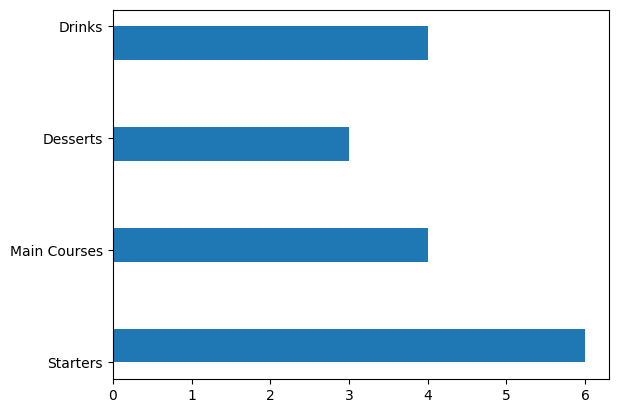

In [38]:
plt.hist(data.type,orientation='horizontal')
plt.show()

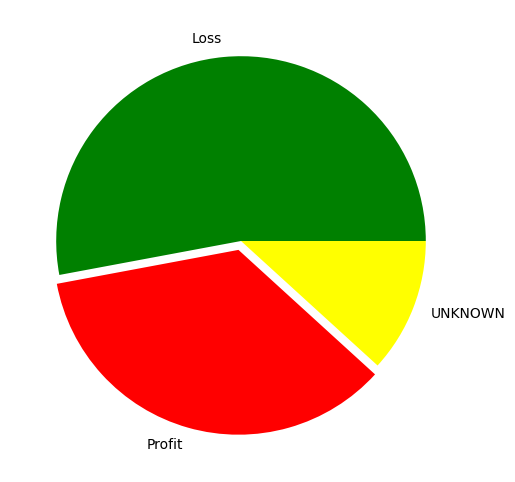

In [39]:
plt.figure(figsize=(8,6))
plt.pie(x=data.profit_status.value_counts(),labels=data.profit_status.unique(),explode=[0,.05,0],colors=['green','red','yellow'])
plt.show()

In [40]:
query = """USE little_lemon"""
cursor.execute(query)

In [17]:
query = """ 
SELECT 
    *
FROM Bookings;
"""
cursor.execute(query)
results = cursor.fetchall()
data = pd.DataFrame(results,columns=cursor.column_names)
data.head()

,BookingID,TableNo,GuestFirstName,GuestLastName,BookingSlot,EmployeeID
0,2,12,Joakim,Iversen,0 days 19:00:00,1
1,3,19,Vanessa,McCarthy,0 days 15:00:00,3
2,5,5,Hiroki,Yamane,0 days 18:30:00,2


In [18]:
### Creation of function

query = """

CREATE FUNCTION MenuPrice(menu_id INT)
RETURNS DECIMAL(10,2) DETERMINISTIC
BEGIN
    DECLARE menuprice DECIMAL(10,2);
    SELECT price INTO menuprice FROM MenuItems WHERE menuID = menu_id;
    RETURN menuprice ;
END ;
"""
cursor.execute(query)

ProgrammingError: 1304 (42000): FUNCTION MenuPrice already exists

In [43]:
### Creation of function

query = """
DROP FUNCTION retreiveMenuPrice;
"""
cursor.execute(query)

ProgrammingError: 1305 (42000): FUNCTION little_lemon.retreiveMenuPrice does not exist

In [44]:
### Call function
cursor = connection.cursor(buffered=True)
query = """ SELECT MenuPrice(4) """
cursor.execute(query)
result = cursor.fetchone()
print(result)

(Decimal('8.00'),)


## Datetime

In [45]:
import datetime as dt

In [46]:
dat = dt.datetime.now()

print(dat)
print(dat.date())
print(dat.time())

2025-01-16 14:27:17.692088
2025-01-16
14:27:17.692088


In [47]:
week = dt.timedelta(days=7) + dat
print(week)

2025-01-23 14:27:17.692088


## Store procedures

In [48]:
query =""" 

CREATE PROCEDURE bookingItems()
BEGIN
SELECT * FROM bookings;
END;
"""
cursor.execute(query)

ProgrammingError: 1304 (42000): PROCEDURE bookingItems already exists

In [49]:
query = "CALL bookingItems"
cursor.execute(query)
results = cursor.fetchall()
for result in results:
    print(result)

(2, 12, 'Joakim', 'Iversen', datetime.timedelta(seconds=68400), 1)
(3, 19, 'Vanessa', 'McCarthy', datetime.timedelta(seconds=54000), 3)
(5, 5, 'Hiroki', 'Yamane', datetime.timedelta(seconds=66600), 2)


In [54]:
cursor.callproc("bookingItems")
results = next(cursor.stored_results())
dataset = results.fetchall()

In [57]:
for result in dataset:
    print(result)

(2, 12, 'Joakim', 'Iversen', datetime.timedelta(seconds=68400), 1)
(3, 19, 'Vanessa', 'McCarthy', datetime.timedelta(seconds=54000), 3)
(5, 5, 'Hiroki', 'Yamane', datetime.timedelta(seconds=66600), 2)


In [50]:
query =""" 
DROP PROCEDURE bookingItems;
"""
cursor.execute(query)

DatabaseError: 2014 (HY000): Commands out of sync; you can't run this command now

## Pooling

In [19]:
from mysql.connector.pooling import MySQLConnectionPool
import mysql.connector as conn

In [2]:
pool = MySQLConnectionPool(pool_name="little_lemon_pool",pool_size=5, host="localhost", user="root", password="FATIHAM68860",database="little_lemon")

In [3]:
users = ["simean","sebgo","sana","ouedraogo","sawadogo"]

In [4]:
query = """SELECT * FROM bookings WHERE bookingId = "%(booking_id)s" """

In [12]:
for i in range( pool.pool_size ):
    conn = pool.get_connection()
    if conn.is_connected():
        cursor = conn.cursor()
        print("The connection id for {} is requesting info on book {}".format(users[i],conn.connection_id,i+1))
        cursor.execute(query,{"booking_id":i+1})
        print(cursor.fetchall())
    else:
        print("No live connection made")

    conn.close()

The connection id for simean is requesting info on book 9
[]
The connection id for sebgo is requesting info on book 9
[(2, 12, 'Joakim', 'Iversen', datetime.timedelta(seconds=68400), 1)]
The connection id for sana is requesting info on book 9
[(3, 19, 'Vanessa', 'McCarthy', datetime.timedelta(seconds=54000), 3)]
The connection id for ouedraogo is requesting info on book 9
[]
The connection id for sawadogo is requesting info on book 9
[(5, 5, 'Hiroki', 'Yamane', datetime.timedelta(seconds=66600), 2)]


## Prepare statement

In [35]:
connection = conn.connect(password="FATIHAM68860",user="root",database="little_lemon")
# cursor = connection.cursor(buffered=True)

query = """
PREPARE booking_prepare FROM 'SELECT * FROM bookings WHERE bookingID = ?';
"""
# cursor.execute(query)

In [36]:
cursor = connection.cursor()
query ="""
SET @booking_id = 5;

EXECUTE booking_prepare USING @booking_id; """

cursor.execute(query)
result = cursor.fetchall()
print(result)

[]
